In [1]:
import matplotlib
import matplotlib.pyplot as plt

In [2]:
num_fc= 2
data_dim_list= [2, 4, 8, 16]
num_tasks_list= [2, 4, 8, 16]

res={}
for data_dim in data_dim_list:
    if data_dim not in res.keys():
        res[data_dim]= {}
    for num_tasks in num_tasks_list:
        if num_tasks not in res[data_dim].keys():            
            res[data_dim][num_tasks]= { 'target_pred_acc': {}, 'target_ica_pred_acc': {}, 'latent_pred_score':{}, 'ica_latent_pred_score':{} }
            
            f= open('../results/invertible/fc_' + str(num_fc) + '/num_tasks_' + str(num_tasks) + '_data_dim_' + str(data_dim) + '.txt', 'r')
            data= f.readlines()
        
            res[data_dim][num_tasks]['target_pred_acc']['mean'] = float(data[-4].split(' ')[-2].replace('\n',''))
            res[data_dim][num_tasks]['target_pred_acc']['std'] = float(data[-4].split(' ')[-1].replace('\n',''))

            res[data_dim][num_tasks]['target_ica_pred_acc']['mean'] = float(data[-2].split(' ')[-2].replace('\n',''))
            res[data_dim][num_tasks]['target_ica_pred_acc']['std'] = float(data[-2].split(' ')[-1].replace('\n',''))

            res[data_dim][num_tasks]['latent_pred_score']['mean'] = float(data[-3].split(' ')[-2].replace('\n',''))
            res[data_dim][num_tasks]['latent_pred_score']['std'] = float(data[-3].split(' ')[-1].replace('\n',''))

            res[data_dim][num_tasks]['ica_latent_pred_score']['mean'] = float(data[-1].split(' ')[-2].replace('\n',''))
            res[data_dim][num_tasks]['ica_latent_pred_score']['std'] = float(data[-1].split(' ')[-1].replace('\n',''))


/var/folders/fx/l6_trssj06g0f2084df078br0000gn/T/ipykernel_26545/2712574156.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[idx].set_xticklabels(num_tasks_list, rotation=25)
/var/folders/fx/l6_trssj06g0f2084df078br0000gn/T/ipykernel_26545/2712574156.py:24: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o--" (-> marker='o'). The keyword argument will take precedence.
  ax[idx].errorbar(num_tasks_list, out, yerr=out_err, marker= marker_list[0], markersize= fontsize_lgd, linewidth=4, fmt='o--', label='Standard')
/var/folders/fx/l6_trssj06g0f2084df078br0000gn/T/ipykernel_26545/2712574156.py:34: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o--" (-> marker='o'). The keyword argument will take precedence.
  ax[idx].errorbar(num_tasks_list, out, yerr=out_err, marker= marker_list[0], markersize= fontsize_lgd, linewidth=4, fmt='o--', label='ICA')


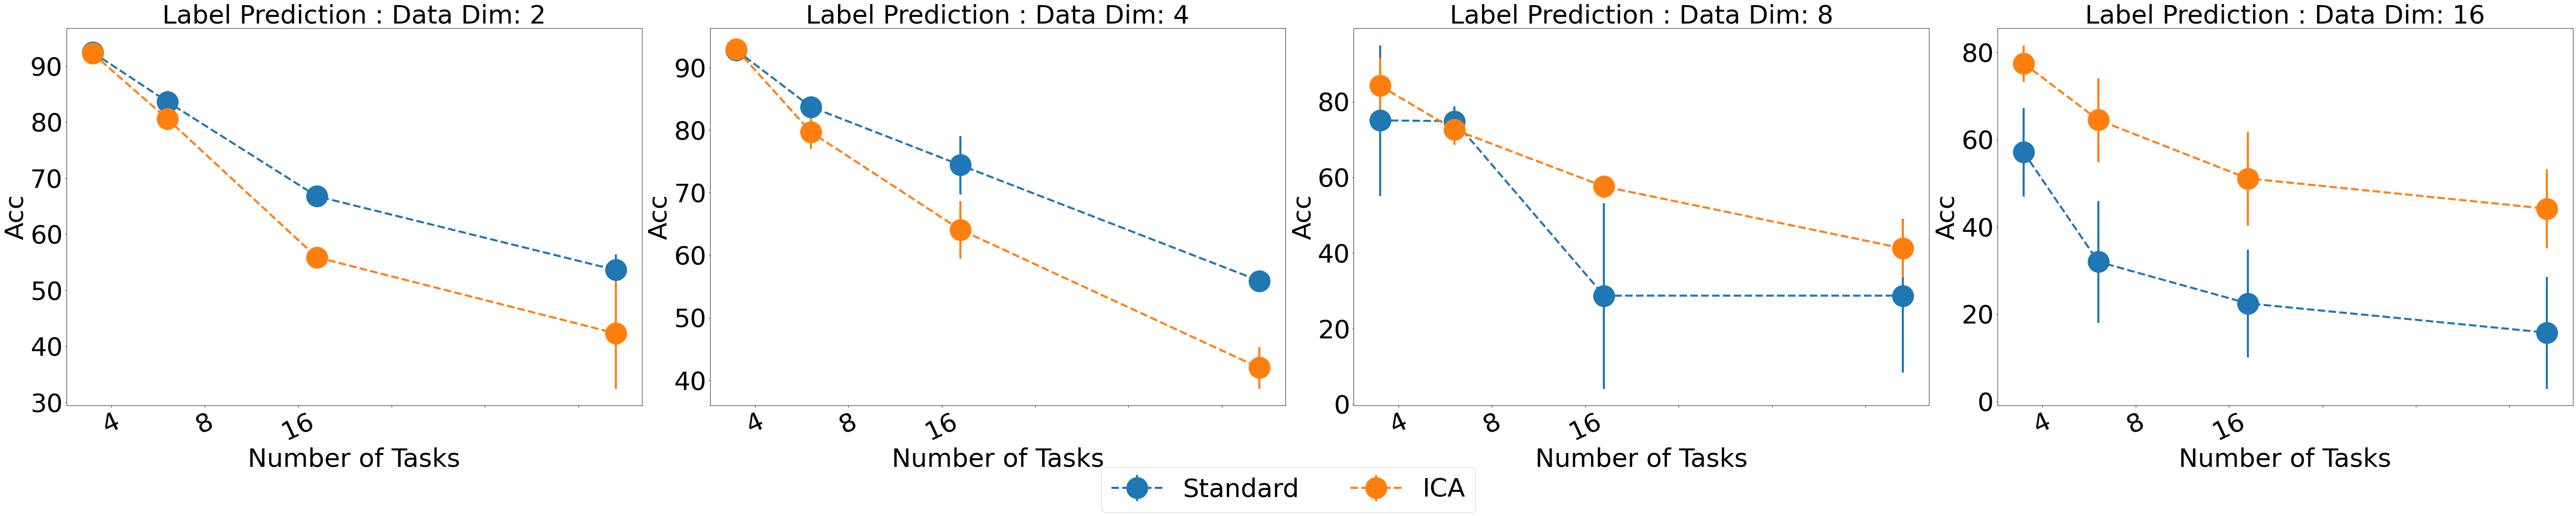

In [3]:
matplotlib.rcParams.update({'errorbar.capsize': 2})
fig, ax = plt.subplots(1, len(data_dim_list), figsize=(70, 13))
fontsize=50
fontsize_lgd= fontsize/1.2
marker_list = ['o', '^']

idx=0
for data_dim in data_dim_list:
    
    ax[idx].tick_params(labelsize=fontsize)
    ax[idx].set_xticklabels(num_tasks_list, rotation=25)
    ax[idx].set_ylabel('Acc', fontsize=fontsize)
    ax[idx].set_xlabel('Number of Tasks', fontsize=fontsize)
    ax[idx].set_title('Label Prediction ' + ':' + ' Data Dim: ' + str(data_dim), fontsize=fontsize)    
    
    key='target_pred_acc'
    out=[]
    out_err=[]
    for num_tasks in num_tasks_list:
        data= res[data_dim][num_tasks][key]
        out.append(data['mean'])
        out_err.append(data['std'])

    ax[idx].errorbar(num_tasks_list, out, yerr=out_err, marker= marker_list[0], markersize= fontsize_lgd, linewidth=4, fmt='o--', label='Standard')

    key='target_ica_pred_acc'
    out=[]
    out_err=[]
    for num_tasks in num_tasks_list:
        data= res[data_dim][num_tasks][key]
        out.append(data['mean'])
        out_err.append(data['std'])

    ax[idx].errorbar(num_tasks_list, out, yerr=out_err, marker= marker_list[0], markersize= fontsize_lgd, linewidth=4, fmt='o--', label='ICA')
    
    
    idx=idx+1
    
    
lines, labels = fig.axes[-1].get_legend_handles_labels()    
lgd= fig.legend(lines, labels, loc="lower center", bbox_to_anchor=(0.5, -0.1), fontsize=fontsize, ncol=3)
    
plt.tight_layout()
# plt.savefig('../plots_final/rmse_label.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight',  dpi=600)

In [ ]:
num_fc= 3
data_dim_list= [2, 8, 32, 64]
num_tasks_list= [1, 2, 4, 8]

res={}
for data_dim in data_dim_list:
    if data_dim not in res.keys():
        res[data_dim]= {}
    for num_tasks in num_tasks_list:
        if num_tasks not in res[data_dim].keys():            
            res[data_dim][num_tasks]= { 'rmse_y': {}, 'r2_y':{}, 'rmse_y_check': {}, 'r2_y_check':{}  }
            
            f= open('../results/non_invertible/fc_' + str(num_fc) + '/num_tasks_' + str(num_tasks) + '_data_dim_' + str(data_dim) + '.txt', 'r')
            data= f.readlines()
        
            res[data_dim][num_tasks]['rmse_y']['mean'] = float(data[-4].split(' ')[-2].replace('\n',''))
            res[data_dim][num_tasks]['rmse_y']['std'] = float(data[-4].split(' ')[-1].replace('\n',''))

            res[data_dim][num_tasks]['r2_y']['mean'] = float(data[-3].split(' ')[-2].replace('\n',''))
            res[data_dim][num_tasks]['r2_y']['std'] = float(data[-3].split(' ')[-1].replace('\n',''))
            
            res[data_dim][num_tasks]['rmse_y_check']['mean'] = float(data[-2].split(' ')[-2].replace('\n',''))
            res[data_dim][num_tasks]['rmse_y_check']['std'] = float(data[-2].split(' ')[-1].replace('\n',''))
            
            res[data_dim][num_tasks]['r2_y_check']['mean'] = float(data[-1].split(' ')[-2].replace('\n',''))
            res[data_dim][num_tasks]['r2_y_check']['std'] = float(data[-1].split(' ')[-1].replace('\n',''))

/var/folders/fx/l6_trssj06g0f2084df078br0000gn/T/ipykernel_26545/1337413785.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[idx].set_xticklabels(num_tasks_list, rotation=25)
/var/folders/fx/l6_trssj06g0f2084df078br0000gn/T/ipykernel_26545/1337413785.py:24: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o--" (-> marker='o'). The keyword argument will take precedence.
  ax[idx].errorbar(num_tasks_list, out, yerr=out_err, marker= marker_list[0], markersize= fontsize_lgd, linewidth=4, fmt='o--', label='Standard')
/var/folders/fx/l6_trssj06g0f2084df078br0000gn/T/ipykernel_26545/1337413785.py:34: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o--" (-> marker='o'). The keyword argument will take precedence.
  ax[idx].errorbar(num_tasks_list, out, yerr=out_err, marker= marker_list[0], markersize= fontsize_lgd, linewidth=4, fmt='o--', label='ICA')


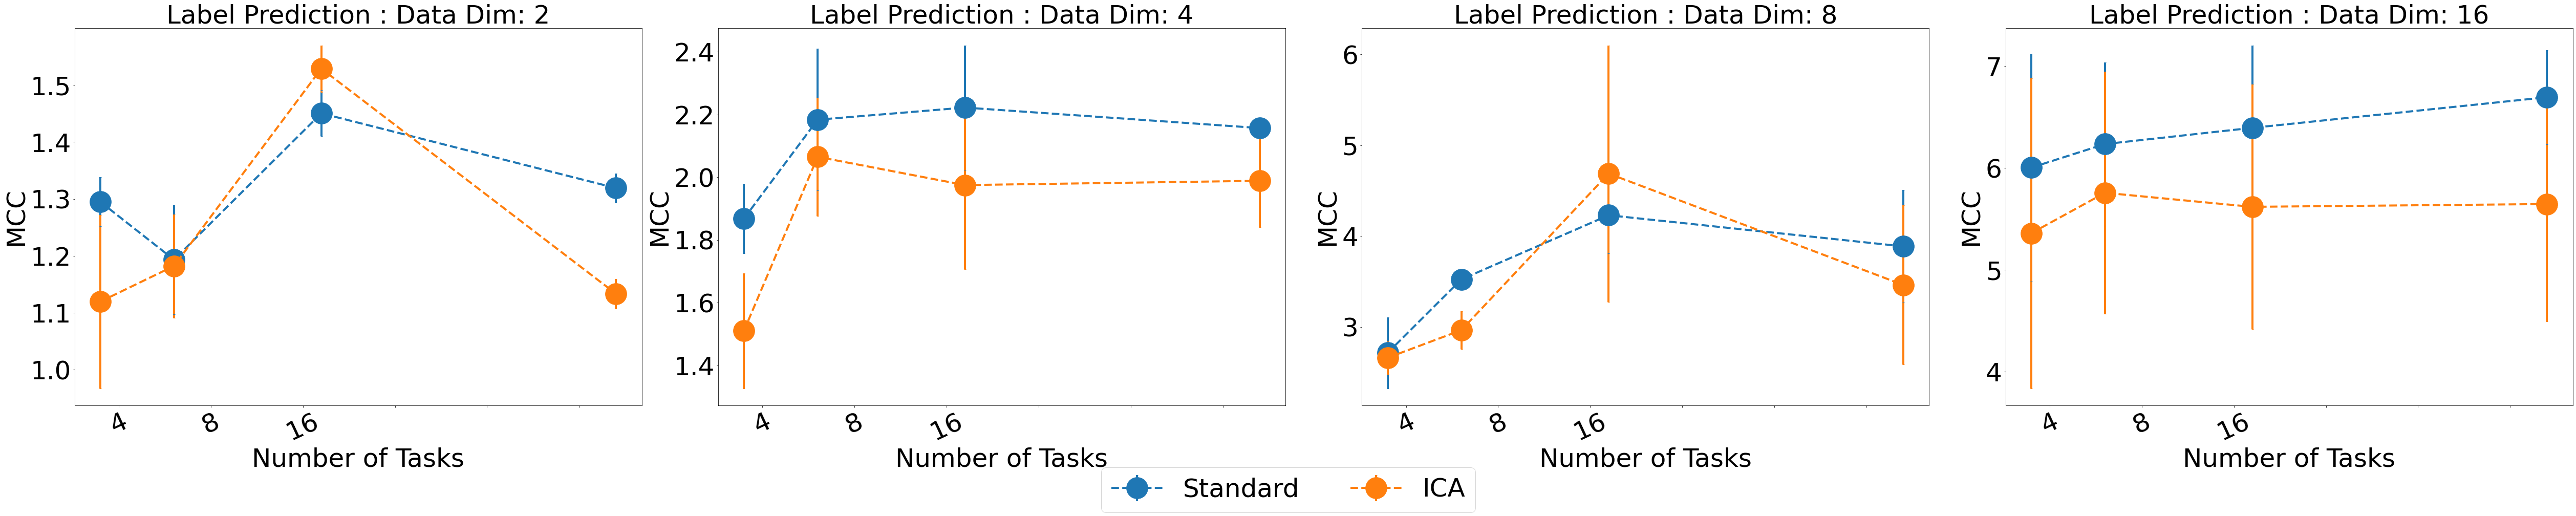

In [4]:
matplotlib.rcParams.update({'errorbar.capsize': 2})
fig, ax = plt.subplots(1, len(data_dim_list), figsize=(70, 13))
fontsize=50
fontsize_lgd= fontsize/1.2
marker_list = ['o', '^']

idx=0
for data_dim in data_dim_list:
    
    ax[idx].tick_params(labelsize=fontsize)
    ax[idx].set_xticklabels(num_tasks_list, rotation=25)
    ax[idx].set_ylabel('MCC', fontsize=fontsize)
    ax[idx].set_xlabel('Number of Tasks', fontsize=fontsize)
    ax[idx].set_title('Label Prediction ' + ':' + ' Data Dim: ' + str(data_dim), fontsize=fontsize)    
    
    key='latent_pred_score'
    out=[]
    out_err=[]
    for num_tasks in num_tasks_list:
        data= res[data_dim][num_tasks][key]
        out.append(data['mean'])
        out_err.append(data['std'])

    ax[idx].errorbar(num_tasks_list, out, yerr=out_err, marker= marker_list[0], markersize= fontsize_lgd, linewidth=4, fmt='o--', label='Standard')

    key='ica_latent_pred_score'
    out=[]
    out_err=[]
    for num_tasks in num_tasks_list:
        data= res[data_dim][num_tasks][key]
        out.append(data['mean'])
        out_err.append(data['std'])

    ax[idx].errorbar(num_tasks_list, out, yerr=out_err, marker= marker_list[0], markersize= fontsize_lgd, linewidth=4, fmt='o--', label='ICA')
    
    
    idx=idx+1
    
    
lines, labels = fig.axes[-1].get_legend_handles_labels()    
lgd= fig.legend(lines, labels, loc="lower center", bbox_to_anchor=(0.5, -0.1), fontsize=fontsize, ncol=3)
    
plt.tight_layout()
# plt.savefig('../plots_final/rmse_label.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight',  dpi=600)

# RMSE

In [ ]:
matplotlib.rcParams.update({'errorbar.capsize': 2})
fig, ax = plt.subplots(1, len(data_dim_list), figsize=(70, 13))
fontsize=50
fontsize_lgd= fontsize/1.2
marker_list = ['o', '^']

idx=0
for data_dim in data_dim_list:
    
    ax[idx].tick_params(labelsize=fontsize)
    ax[idx].set_xticklabels(num_tasks_list, rotation=25)
    ax[idx].set_ylabel('RMSE', fontsize=fontsize)
    ax[idx].set_xlabel('Number of Tasks', fontsize=fontsize)
    ax[idx].set_title('Label Prediction ' + ':' + ' Data Dim: ' + str(data_dim), fontsize=fontsize)    
    
    key='rmse_y'
    out=[]
    out_err=[]
    for num_tasks in num_tasks_list:
        data= res[data_dim][num_tasks][key]
        out.append(data['mean'])
        out_err.append(data['std'])

    ax[idx].errorbar(num_tasks_list, out, yerr=out_err, marker= marker_list[0], markersize= fontsize_lgd, linewidth=4, fmt='o--', label='Standard')

    key='rmse_y_check'
    out=[]
    out_err=[]
    for num_tasks in num_tasks_list:
        data= res[data_dim][num_tasks][key]
        out.append(data['mean'])
        out_err.append(data['std'])

    ax[idx].errorbar(num_tasks_list, out, yerr=out_err, marker= marker_list[0], markersize= fontsize_lgd, linewidth=4, fmt='o--', label='Check')
    
    
    idx=idx+1
    
    
lines, labels = fig.axes[-1].get_legend_handles_labels()    
lgd= fig.legend(lines, labels, loc="lower center", bbox_to_anchor=(0.5, -0.1), fontsize=fontsize, ncol=3)
    
plt.tight_layout()
# plt.savefig('../plots_final/rmse_label.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight',  dpi=600)

# R2

In [ ]:
matplotlib.rcParams.update({'errorbar.capsize': 2})
fig, ax = plt.subplots(1, len(data_dim_list), figsize=(70, 13))
fontsize=50
fontsize_lgd= fontsize/1.2
marker_list = ['o', '^']

idx=0
for data_dim in data_dim_list:
    
    ax[idx].tick_params(labelsize=fontsize)
    ax[idx].set_xticklabels(num_tasks_list, rotation=25)
    ax[idx].set_ylabel('RMSE', fontsize=fontsize)
    ax[idx].set_xlabel('Number of Tasks', fontsize=fontsize)
    ax[idx].set_title('Label Prediction ' + ':' + ' Data Dim: ' + str(data_dim), fontsize=fontsize)    
    
    key='r2_y'
    out=[]
    out_err=[]
    for num_tasks in num_tasks_list:
        data= res[data_dim][num_tasks][key]
        out.append(data['mean'])
        out_err.append(data['std'])

    ax[idx].errorbar(num_tasks_list, out, yerr=out_err, marker= marker_list[0], markersize= fontsize_lgd, linewidth=4, fmt='o--', label='Standard')

    key='r2_y_check'
    out=[]
    out_err=[]
    for num_tasks in num_tasks_list:
        data= res[data_dim][num_tasks][key]
        out.append(data['mean'])
        out_err.append(data['std'])

    ax[idx].errorbar(num_tasks_list, out, yerr=out_err, marker= marker_list[0], markersize= fontsize_lgd, linewidth=4, fmt='o--', label='Check')
    
    
    idx=idx+1
    
    
lines, labels = fig.axes[-1].get_legend_handles_labels()    
lgd= fig.legend(lines, labels, loc="lower center", bbox_to_anchor=(0.5, -0.1), fontsize=fontsize, ncol=3)
    
plt.tight_layout()
# plt.savefig('../plots_final/rmse_label.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight',  dpi=600)

In [ ]:
num_fc= 3
data_dim_list= [2, 8, 32, 64, 128]
num_tasks_list= [1, 8, 32]

res={}
for data_dim in data_dim_list:
    if data_dim not in res.keys():
        res[data_dim]= {}
    for num_tasks in num_tasks_list:
        if num_tasks not in res[data_dim].keys():            
            res[data_dim][num_tasks]= { 'rmse_y': {}, 'r2_y':{}, 'rmse_latent' : {}, 'r2_latent' :{} , 'rmse_y_ica' :{}, 'r2_y_ica':{}, 'rmse_latent_ica' :{}, 'r2_latent_ica' : {}  }
            
#             print('../results/non_invertible/fc_' + str(num_fc) + '/num_tasks_' + str(num_tasks) + '_data_dim_' + str(data_dim) + '.txt')
            f= open('../results/non_invertible/fc_' + str(num_fc) + '/num_tasks_' + str(num_tasks) + '_data_dim_' + str(data_dim) + '.txt', 'r')
            data= f.readlines()
        
            res[data_dim][num_tasks]['rmse_y']['mean'] = float(data[-8].split(' ')[-2].replace('\n',''))
            res[data_dim][num_tasks]['rmse_y']['std'] = float(data[-8].split(' ')[-1].replace('\n',''))

            res[data_dim][num_tasks]['r2_y']['mean'] = float(data[-7].split(' ')[-2].replace('\n',''))
            res[data_dim][num_tasks]['r2_y']['std'] = float(data[-7].split(' ')[-1].replace('\n',''))
            
            res[data_dim][num_tasks]['rmse_latent']['mean'] = float(data[-6].split(' ')[-2].replace('\n',''))
            res[data_dim][num_tasks]['rmse_latent']['std'] = float(data[-6].split(' ')[-1].replace('\n',''))

            res[data_dim][num_tasks]['r2_latent']['mean'] = float(data[-5].split(' ')[-2].replace('\n',''))
            res[data_dim][num_tasks]['r2_latent']['std'] = float(data[-5].split(' ')[-1].replace('\n',''))
            
            res[data_dim][num_tasks]['rmse_y_ica']['mean'] = float(data[-4].split(' ')[-2].replace('\n',''))
            res[data_dim][num_tasks]['rmse_y_ica']['std'] = float(data[-4].split(' ')[-1].replace('\n',''))

            res[data_dim][num_tasks]['r2_y_ica']['mean'] = float(data[-3].split(' ')[-2].replace('\n',''))
            res[data_dim][num_tasks]['r2_y_ica']['std'] = float(data[-3].split(' ')[-1].replace('\n',''))
            
            res[data_dim][num_tasks]['rmse_latent_ica']['mean'] = float(data[-2].split(' ')[-2].replace('\n',''))
            res[data_dim][num_tasks]['rmse_latent_ica']['std'] = float(data[-2].split(' ')[-1].replace('\n',''))
            
            res[data_dim][num_tasks]['r2_latent_ica']['mean'] = float(data[-1].split(' ')[-2].replace('\n',''))
            res[data_dim][num_tasks]['r2_latent_ica']['std'] = float(data[-1].split(' ')[-1].replace('\n',''))

# RMSE: Label Prediction

In [ ]:
matplotlib.rcParams.update({'errorbar.capsize': 2})
fig, ax = plt.subplots(1, len(data_dim_list), figsize=(70, 13))
fontsize=50
fontsize_lgd= fontsize/1.2
marker_list = ['o', '^']

idx=0
for data_dim in data_dim_list:
    
    ax[idx].tick_params(labelsize=fontsize)
    ax[idx].set_xticklabels(num_tasks_list, rotation=25)
    ax[idx].set_ylabel('RMSE', fontsize=fontsize)
    ax[idx].set_xlabel('Number of Tasks', fontsize=fontsize)
    ax[idx].set_title('Label Prediction ' + ':' + ' Data Dim: ' + str(data_dim), fontsize=fontsize)    
    
    key='rmse_y'
    out=[]
    out_err=[]
    for num_tasks in num_tasks_list:
        data= res[data_dim][num_tasks][key]
        out.append(data['mean'])
        out_err.append(data['std'])

    ax[idx].errorbar(num_tasks_list, out, yerr=out_err, marker= marker_list[0], markersize= fontsize_lgd, linewidth=4, fmt='o--', label='Standard')

    key='rmse_y_ica'
    out=[]
    out_err=[]
    for num_tasks in num_tasks_list:
        data= res[data_dim][num_tasks][key]
        out.append(data['mean'])
        out_err.append(data['std'])

    ax[idx].errorbar(num_tasks_list, out, yerr=out_err, marker= marker_list[0], markersize= fontsize_lgd, linewidth=4, fmt='o--', label='ICA')        
    
    idx=idx+1
    
    
lines, labels = fig.axes[-1].get_legend_handles_labels()    
lgd= fig.legend(lines, labels, loc="lower center", bbox_to_anchor=(0.5, -0.1), fontsize=fontsize, ncol=3)
    
plt.tight_layout()
plt.savefig('../plots_final/rmse_label.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight',  dpi=600)

# R2 Score: Label Prediction

In [ ]:
matplotlib.rcParams.update({'errorbar.capsize': 2})
fig, ax = plt.subplots(1, len(data_dim_list), figsize=(70, 13))
fontsize=50
fontsize_lgd= fontsize/1.2
marker_list = ['o', '^']

idx=0
for data_dim in data_dim_list:
    
    ax[idx].tick_params(labelsize=fontsize)
    ax[idx].set_xticklabels(num_tasks_list, rotation=25)
    ax[idx].set_ylabel('R2', fontsize=fontsize)
    ax[idx].set_xlabel('Number of Tasks', fontsize=fontsize)
    ax[idx].set_title('Label Prediction ' + ':' + ' Data Dim: ' + str(data_dim), fontsize=fontsize)    
    
    key='r2_y'
    out=[]
    out_err=[]
    for num_tasks in num_tasks_list:
        data= res[data_dim][num_tasks][key]
        out.append(data['mean'])
        out_err.append(data['std'])

    ax[idx].errorbar(num_tasks_list, out, yerr=out_err, marker= marker_list[0], markersize= fontsize_lgd, linewidth=4, fmt='o--', label='Standard')

    key='r2_y_ica'
    out=[]
    out_err=[]
    for num_tasks in num_tasks_list:
        data= res[data_dim][num_tasks][key]
        out.append(data['mean'])
        out_err.append(data['std'])

    ax[idx].errorbar(num_tasks_list, out, yerr=out_err, marker= marker_list[0], markersize= fontsize_lgd, linewidth=4, fmt='o--', label='ICA')        
    
    idx=idx+1
    
    
lines, labels = fig.axes[-1].get_legend_handles_labels()    
lgd= fig.legend(lines, labels, loc="lower center", bbox_to_anchor=(0.5, -0.1), fontsize=fontsize, ncol=3)
    
plt.tight_layout()
plt.savefig('../plots_final/r2_label.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight',  dpi=600)

# RMSE: Latent Prediction

In [ ]:
matplotlib.rcParams.update({'errorbar.capsize': 2})
fig, ax = plt.subplots(1, len(data_dim_list), figsize=(70, 13))
fontsize=50
fontsize_lgd= fontsize/1.2
marker_list = ['o', '^']

idx=0
for data_dim in data_dim_list:
    
    ax[idx].tick_params(labelsize=fontsize)
    ax[idx].set_xticklabels(num_tasks_list, rotation=25)
    ax[idx].set_ylabel('RMSE', fontsize=fontsize)
    ax[idx].set_xlabel('Number of Tasks', fontsize=fontsize)
    ax[idx].set_title('Latent Prediction ' + ':' + ' Data Dim: ' + str(data_dim), fontsize=fontsize)    
    
    key='rmse_latent'
    out=[]
    out_err=[]
    for num_tasks in num_tasks_list:
        data= res[data_dim][num_tasks][key]
        out.append(data['mean'])
        out_err.append(data['std'])

    ax[idx].errorbar(num_tasks_list, out, yerr=out_err, marker= marker_list[0], markersize= fontsize_lgd, linewidth=4, fmt='o--', label='Standard')

    key='rmse_latent_ica'
    out=[]
    out_err=[]
    for num_tasks in num_tasks_list:
        data= res[data_dim][num_tasks][key]
        out.append(data['mean'])
        out_err.append(data['std'])

    ax[idx].errorbar(num_tasks_list, out, yerr=out_err, marker= marker_list[0], markersize= fontsize_lgd, linewidth=4, fmt='o--', label='ICA')        
    
    idx=idx+1
    
    
lines, labels = fig.axes[-1].get_legend_handles_labels()    
lgd= fig.legend(lines, labels, loc="lower center", bbox_to_anchor=(0.5, -0.1), fontsize=fontsize, ncol=3)
    
plt.tight_layout()
plt.savefig('../plots_final/rmse_latent.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight',  dpi=600)

# R2 Latent Prediction

In [ ]:
matplotlib.rcParams.update({'errorbar.capsize': 2})
fig, ax = plt.subplots(1, len(data_dim_list), figsize=(70, 13))
fontsize=50
fontsize_lgd= fontsize/1.2
marker_list = ['o', '^']

idx=0
for data_dim in data_dim_list:
    
    ax[idx].tick_params(labelsize=fontsize)
    ax[idx].set_xticklabels(num_tasks_list, rotation=25)
    ax[idx].set_ylabel('R2', fontsize=fontsize)
    ax[idx].set_xlabel('Number of Tasks', fontsize=fontsize)
    ax[idx].set_title('Latent Prediction ' + ':' + ' Data Dim: ' + str(data_dim), fontsize=fontsize)    
    
    key='r2_latent'
    out=[]
    out_err=[]
    for num_tasks in num_tasks_list:
        data= res[data_dim][num_tasks][key]
        out.append(data['mean'])
        out_err.append(data['std'])

    ax[idx].errorbar(num_tasks_list, out, yerr=out_err, marker= marker_list[0], markersize= fontsize_lgd, linewidth=4, fmt='o--', label='Standard')

    key='r2_latent_ica'
    out=[]
    out_err=[]
    for num_tasks in num_tasks_list:
        data= res[data_dim][num_tasks][key]
        out.append(data['mean'])
        out_err.append(data['std'])

    ax[idx].errorbar(num_tasks_list, out, yerr=out_err, marker= marker_list[0], markersize= fontsize_lgd, linewidth=4, fmt='o--', label='ICA')        
    
    idx=idx+1
    
    
lines, labels = fig.axes[-1].get_legend_handles_labels()    
lgd= fig.legend(lines, labels, loc="lower center", bbox_to_anchor=(0.5, -0.1), fontsize=fontsize, ncol=3)
    
plt.tight_layout()
plt.savefig('../plots_final/r2_latent.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight',  dpi=600)

# X to Z Prediction Sanity Check

In [ ]:
num_fc= 4
data_dim_list= [2, 8, 32, 64, 128]
num_tasks_list= [1, 2, 4, 8]

res={}
for data_dim in data_dim_list:
    if data_dim not in res.keys():
        res[data_dim]= {}
    for num_tasks in num_tasks_list:
        if num_tasks not in res[data_dim].keys():            
            res[data_dim][num_tasks]= { 'rmse_y': {}, 'r2_y':{}, 'rmse_latent' : {}, 'r2_latent' :{} , 'rmse_y_ica' :{}, 'r2_y_ica':{}, 'rmse_latent_ica' :{}, 'r2_latent_ica' : {}  }
            
            f= open('../results/non_invertible/fc_' + str(num_fc) + '/num_tasks_' + str(num_tasks) + '_data_dim_' + str(data_dim) + '_latent_prediction_task.txt', 'r')
            data= f.readlines()
        
            res[data_dim][num_tasks]['rmse_y']['mean'] = float(data[-2].split(' ')[-2].replace('\n',''))
            res[data_dim][num_tasks]['rmse_y']['std'] = float(data[-2].split(' ')[-1].replace('\n',''))

            res[data_dim][num_tasks]['r2_y']['mean'] = float(data[-1].split(' ')[-2].replace('\n',''))
            res[data_dim][num_tasks]['r2_y']['std'] = float(data[-1].split(' ')[-1].replace('\n',''))

# RMSE

In [ ]:
matplotlib.rcParams.update({'errorbar.capsize': 2})
fig, ax = plt.subplots(1, len(data_dim_list), figsize=(70, 13))
fontsize=50
fontsize_lgd= fontsize/1.2
marker_list = ['o', '^']

idx=0
for data_dim in data_dim_list:
    
    ax[idx].tick_params(labelsize=fontsize)
    ax[idx].set_xticklabels(num_tasks_list, rotation=25)
    ax[idx].set_ylabel('RMSE', fontsize=fontsize)
    ax[idx].set_xlabel('Number of Tasks', fontsize=fontsize)
    ax[idx].set_title('Label Prediction ' + ':' + ' Data Dim: ' + str(data_dim), fontsize=fontsize)    
    
    key='rmse_y'
    out=[]
    out_err=[]
    for num_tasks in num_tasks_list:
        data= res[data_dim][num_tasks][key]
        out.append(data['mean'])
        out_err.append(data['std'])

    ax[idx].errorbar(num_tasks_list, out, yerr=out_err, marker= marker_list[0], markersize= fontsize_lgd, linewidth=4, fmt='o--', label='Standard')
    
    idx=idx+1
    
    
lines, labels = fig.axes[-1].get_legend_handles_labels()    
lgd= fig.legend(lines, labels, loc="lower center", bbox_to_anchor=(0.5, -0.1), fontsize=fontsize, ncol=3)
    
plt.tight_layout()
# plt.savefig('../plots_final/rmse_label.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight',  dpi=600)

# R2

In [ ]:
matplotlib.rcParams.update({'errorbar.capsize': 2})
fig, ax = plt.subplots(1, len(data_dim_list), figsize=(70, 13))
fontsize=50
fontsize_lgd= fontsize/1.2
marker_list = ['o', '^']

idx=0
for data_dim in data_dim_list:
    
    ax[idx].tick_params(labelsize=fontsize)
    ax[idx].set_xticklabels(num_tasks_list, rotation=25)
    ax[idx].set_ylabel('R2', fontsize=fontsize)
    ax[idx].set_xlabel('Number of Tasks', fontsize=fontsize)
    ax[idx].set_title('Label Prediction ' + ':' + ' Data Dim: ' + str(data_dim), fontsize=fontsize)    
    
    key='r2_y'
    out=[]
    out_err=[]
    for num_tasks in num_tasks_list:
        data= res[data_dim][num_tasks][key]
        out.append(data['mean'])
        out_err.append(data['std'])

    ax[idx].errorbar(num_tasks_list, out, yerr=out_err, marker= marker_list[0], markersize= fontsize_lgd, linewidth=4, fmt='o--', label='Standard')
    
    idx=idx+1
    
    
lines, labels = fig.axes[-1].get_legend_handles_labels()    
lgd= fig.legend(lines, labels, loc="lower center", bbox_to_anchor=(0.5, -0.1), fontsize=fontsize, ncol=3)
    
plt.tight_layout()
# plt.savefig('../plots_final/rmse_label.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight',  dpi=600)

In [ ]:
import numpy as np

In [ ]:
num_tasks=1
dataset_size= 100

In [ ]:
x= np.random.multivariate_normal(np.zeros(num_tasks), 10*np.eye(num_tasks), dataset_size)

In [ ]:
print( np.mean(x), np.var(x))

In [ ]:
x= np.random.multivariate_normal( np.zeros(128), np.eye(128), 5000)
g= np.random.rand(128, 1)
y= np.matmul(x, g) + np.random.multivariate_normal( np.zeros(1), np.eye(1), 5000)

In [ ]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression(fit_intercept= True).fit(x, y)
y_pred= reg.predict(x)
print('RMSE: ', np.sqrt(np.mean((y-y_pred)**2)) ) 

In [ ]:
x_test= np.random.multivariate_normal( np.zeros(128), np.eye(128), 100)
y_test= np.matmul(x_test, g) + np.random.multivariate_normal( np.zeros(1), np.eye(1), 100)

In [ ]:
y_pred= reg.predict(x_test)
print('RMSE: ', np.sqrt(np.mean((y_test-y_pred)**2)) ) 

In [ ]:
import numpy as np

In [ ]:
x=np.random.rand(10)
y=np.random.rand(10)


In [ ]:
np.cov(x, y)[0,1]

In [ ]:
np.cov(x)

In [ ]:
np.cov(y)

In [ ]:
m1= Cross Correlation(z, true_z)
m2= Cross Correlation(z_ica, true_z)

argmax(m1, axis=0)
